<a href="https://colab.research.google.com/github/raihanfathulb/Visualization-Tools/blob/main/Visualization_Tools_2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Download the dataset and read it into a *pandas* dataframe.

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [ ]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


<ipython-input-16-5b807af711f8>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

<ipython-input-17-a80e6e55e017>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df_can.groupby('Continent').sum()


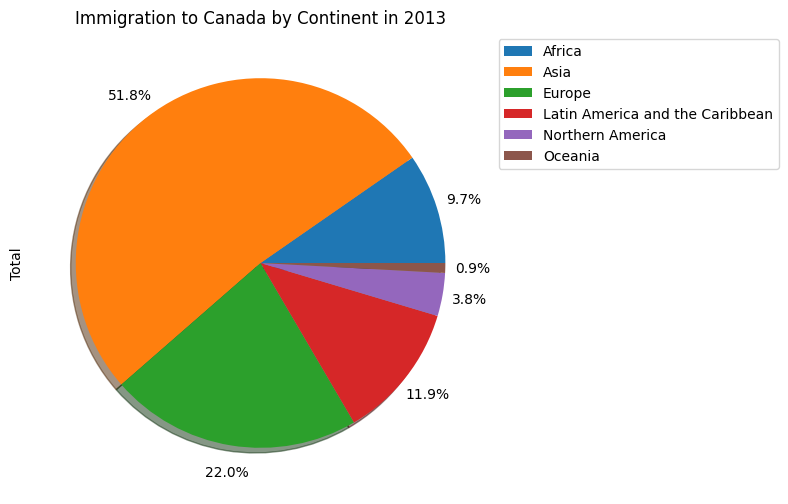

In [ ]:
### type your answer here
import matplotlib.pyplot as plt

df_continents = df_can.groupby('Continent').sum()

explode_list = [0, 0, 0, 0, 0, 0]

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True,
                            labels=None,
                            pctdistance=1.15,
                            explode=explode_list
                            )

plt.title('Immigration to Canada by Continent in 2013')

plt.legend(labels=df_continents.index, bbox_to_anchor=(1, 1))

plt.show()


**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [ ]:
### type your answer here

df_PA = df_can.loc[['Pakistan', 'Afghanistan'], '1980':'2013']

print(df_PA)



             1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Country                                                                  ...   
Pakistan      978   972  1201   900   668   514   691  1072  1334  2261  ...   
Afghanistan    16    39    39    47    71   340   496   741   828  1076  ...   

              2004   2005   2006   2007  2008  2009  2010  2011   2012   2013  
Country                                                                        
Pakistan     13399  14314  13127  10124  8994  7217  6811  7468  11227  12603  
Afghanistan   2978   3436   3009   2652  2111  1746  1758  2203   2635   2004  

[2 rows x 34 columns]


Step 2: Plot data.

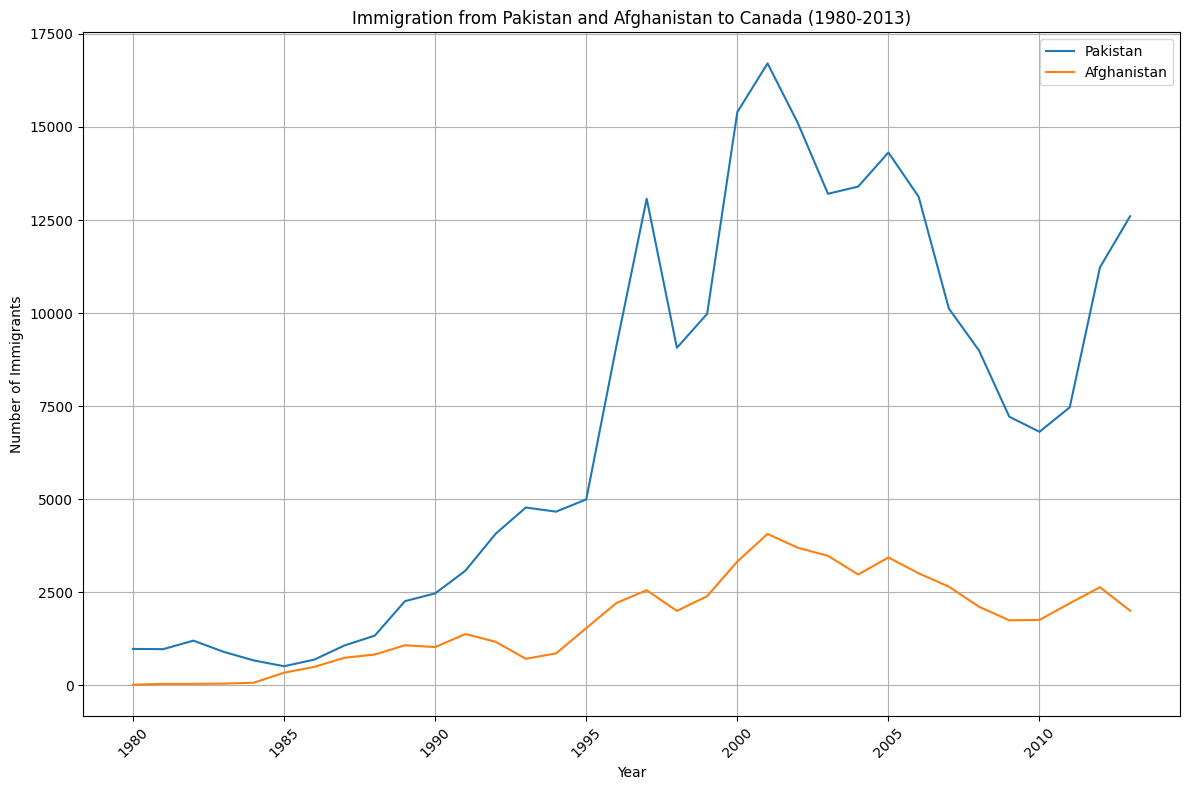

In [ ]:
### type your answer here

import matplotlib.pyplot as plt

df_PA = df_PA.transpose()

plt.figure(figsize=(12, 8))
for country in df_PA.columns:
    plt.plot(df_PA.index.astype(int), df_PA[country], label=country)

plt.title('Immigration from Pakistan and Afghanistan to Canada (1980-2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.xticks(rotation=45)

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()




**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [ ]:
### type your answer here

df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], '1980':'2013']

df_total = pd.DataFrame(df_countries.sum(axis=0))

df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']

print(df_total)


    year  total
0   1980    669
1   1981    678
2   1982    627
3   1983    333
4   1984    252
5   1985    285
6   1986    336
7   1987    387
8   1988    373
9   1989    387
10  1990    331
11  1991    381
12  1992    411
13  1993    481
14  1994    345
15  1995    352
16  1996    301
17  1997    338
18  1998    217
19  1999    287
20  2000    287
21  2001    343
22  2002    293
23  2003    327
24  2004    291
25  2005    324
26  2006    293
27  2007    363
28  2008    339
29  2009    323
30  2010    297
31  2011    276
32  2012    287
33  2013    280


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

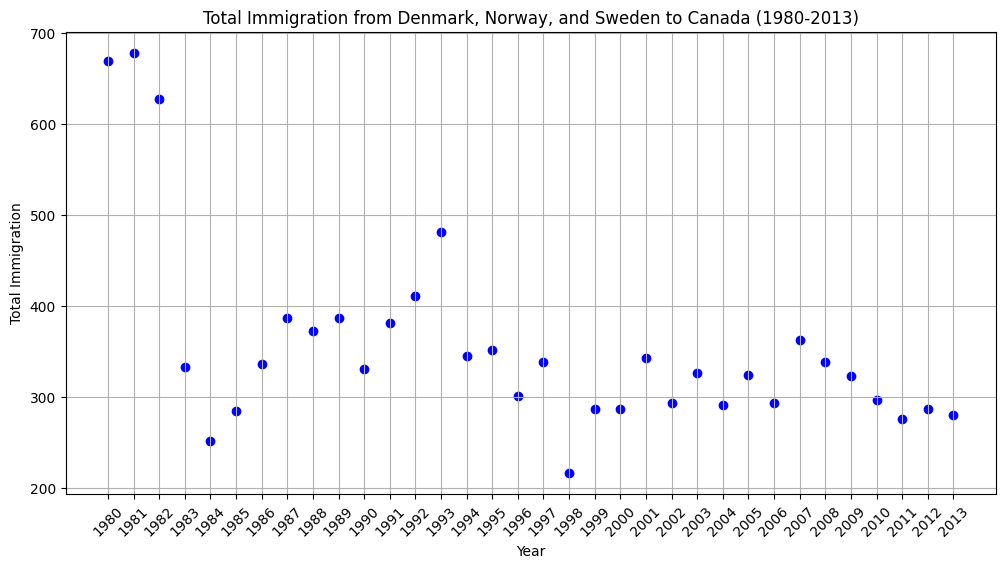

In [ ]:
### type your answer here
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
plt.scatter(df_total['year'], df_total['total'], color='blue')

plt.title('Total Immigration from Denmark, Norway, and Sweden to Canada (1980-2013)')
plt.xlabel('Year')
plt.ylabel('Total Immigration')

plt.xticks(rotation=45)

plt.grid(True)
plt.show()





**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [ ]:
### type your answer here

df_CI = df_can.loc[['China', 'India'], '1980':'2013']

df_CI_normalized = (df_CI - df_CI.min()) / (df_CI.max() - df_CI.min())

print(df_CI_normalized)


         1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Country                                                              ...   
China     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
India     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   

         2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
Country                                                              
China     1.0   1.0   0.0   0.0   1.0   1.0   0.0   1.0   1.0   1.0  
India     0.0   0.0   1.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0  

[2 rows x 34 columns]


Step 2: Generate the bubble plots.

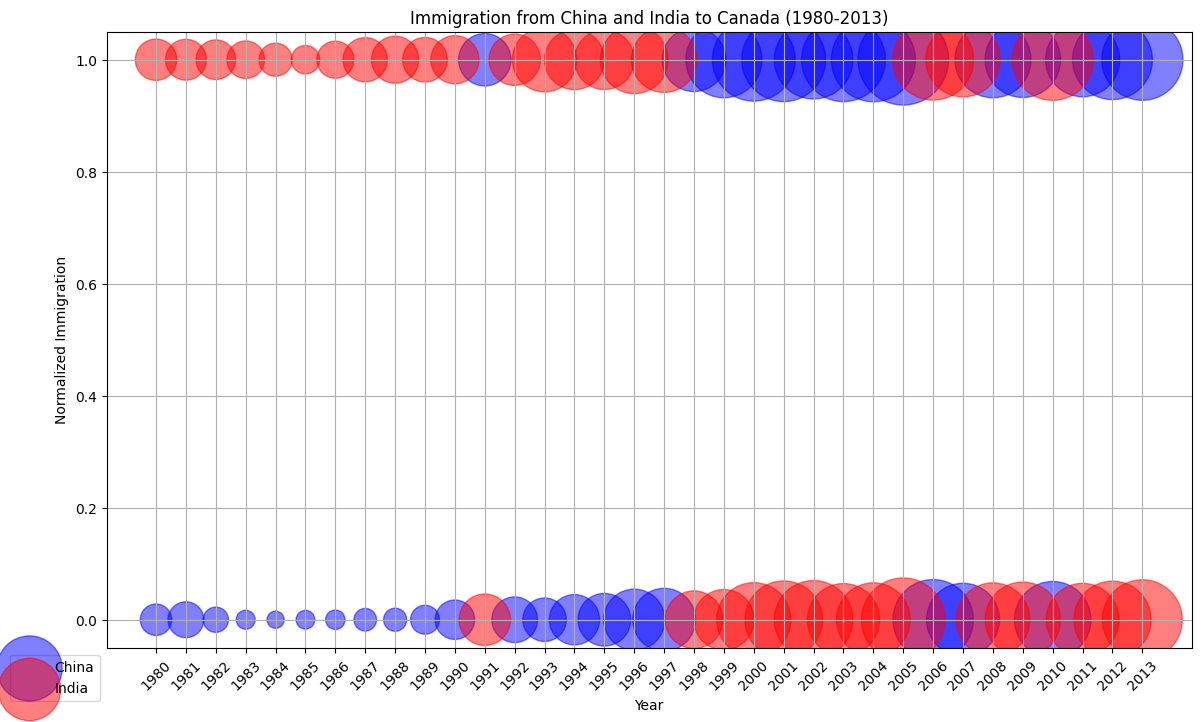

In [ ]:
### type your answer here
import matplotlib.pyplot as plt

# Define figure and axis
plt.figure(figsize=(14, 8))

# Define scaling factor for bubble size
scaling_factor = 0.1

# Plot bubble plot for China
plt.scatter(df_CI_normalized.columns, df_CI_normalized.loc['China'], s=df_CI.loc['China']*scaling_factor, color='blue', alpha=0.5, label='China')

# Plot bubble plot for India
plt.scatter(df_CI_normalized.columns, df_CI_normalized.loc['India'], s=df_CI.loc['India']*scaling_factor, color='red', alpha=0.5, label='India')

# Add title and labels
plt.title('Immigration from China and India to Canada (1980-2013)')
plt.xlabel('Year')
plt.ylabel('Normalized Immigration')
plt.xticks(rotation=45)


# Add legend
plt.legend(bbox_to_anchor=(0, 0))

# Show plot
plt.grid(True)
plt.show()





# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).